<a href="https://colab.research.google.com/github/sushil4625/StockMarketAnalysis/blob/main/autocleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/automobile.csv")
df

,Unnamed: 0,Sector,Company,BSE,Date,Open,High,Low,Close,Adj Close,Volume,Low_52,High_52,PE_Ratio,Total_Revenue,Gross_Profit,Market_Cap,Net_Company
0,0,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-02,1595.000000,1603.949951,1441.150024,1475.000000,1097.873901,285450,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
1,1,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-03,1478.000000,1505.000000,1451.099976,1496.699951,1114.025635,264423,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
2,2,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-04,1496.000000,1505.000000,1416.000000,1426.300049,1061.625610,179477,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
3,3,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-05,1425.000000,1469.800049,1420.000000,1464.800049,1090.281738,100888,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
4,4,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-06,1458.500000,1472.000000,1440.650024,1459.199951,1086.113281,72776,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27565,27565,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-27,1091.099976,1100.300049,1059.400024,1085.250000,1085.250000,41986,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27566,27566,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-28,1096.900024,1096.900024,1073.000000,1080.250000,1080.250000,18565,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27567,27567,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-01,1077.050049,1085.000000,1057.500000,1062.800049,1062.800049,32489,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27568,27568,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-02,1054.550049,1072.150024,1050.000000,1066.349976,1066.349976,33422,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27570 entries, 0 to 27569
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     27570 non-null  int64  
 1   Sector         27570 non-null  object 
 2   Company        27570 non-null  object 
 3   BSE            27570 non-null  object 
 4   Date           27570 non-null  object 
 5   Open           27570 non-null  float64
 6   High           27570 non-null  float64
 7   Low            27570 non-null  float64
 8   Close          27570 non-null  float64
 9   Adj Close      27570 non-null  float64
 10  Volume         27570 non-null  int64  
 11  Low_52         27570 non-null  float64
 12  High_52        27570 non-null  float64
 13  PE_Ratio       27570 non-null  float64
 14  Total_Revenue  27570 non-null  float64
 15  Gross_Profit   27570 non-null  float64
 16  Market_Cap     27570 non-null  int64  
 17  Net_Company    27570 non-null  float64
dtypes: flo

In [ ]:
df.isnull().sum()

Unnamed: 0           0
Sector               0
Company              0
BSE                  0
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Low_52               0
High_52              0
PE_Ratio         16542
Total_Revenue        0
Gross_Profit         0
Market_Cap           0
Net_Company          0
dtype: int64

In [ ]:
#treating missing value
numerical_columns=["PE_Ratio"]

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
df[numerical_columns]=imputer.fit_transform(df[numerical_columns])


In [ ]:
df.isnull().sum()

Unnamed: 0       0
Sector           0
Company          0
BSE              0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Low_52           0
High_52          0
PE_Ratio         0
Total_Revenue    0
Gross_Profit     0
Market_Cap       0
Net_Company      0
dtype: int64

In [ ]:
df

,Unnamed: 0,Sector,Company,BSE,Date,Open,High,Low,Close,Adj Close,Volume,Low_52,High_52,PE_Ratio,Total_Revenue,Gross_Profit,Market_Cap,Net_Company
0,0,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-02,1595.000000,1603.949951,1441.150024,1475.000000,1097.873901,285450,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
1,1,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-03,1478.000000,1505.000000,1451.099976,1496.699951,1114.025635,264423,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
2,2,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-04,1496.000000,1505.000000,1416.000000,1426.300049,1061.625610,179477,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
3,3,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-05,1425.000000,1469.800049,1420.000000,1464.800049,1090.281738,100888,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
4,4,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-06,1458.500000,1472.000000,1440.650024,1459.199951,1086.113281,72776,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27565,27565,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-27,1091.099976,1100.300049,1059.400024,1085.250000,1085.250000,41986,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27566,27566,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-28,1096.900024,1096.900024,1073.000000,1080.250000,1080.250000,18565,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27567,27567,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-01,1077.050049,1085.000000,1057.500000,1062.800049,1062.800049,32489,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27568,27568,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-02,1054.550049,1072.150024,1050.000000,1066.349976,1066.349976,33422,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10


In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df

,Sector,Company,BSE,Date,Open,High,Low,Close,Adj Close,Volume,Low_52,High_52,PE_Ratio,Total_Revenue,Gross_Profit,Market_Cap,Net_Company
0,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-02,1595.000000,1603.949951,1441.150024,1475.000000,1097.873901,285450,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
1,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-03,1478.000000,1505.000000,1451.099976,1496.699951,1114.025635,264423,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
2,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-04,1496.000000,1505.000000,1416.000000,1426.300049,1061.625610,179477,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
3,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-05,1425.000000,1469.800049,1420.000000,1464.800049,1090.281738,100888,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
4,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-06,1458.500000,1472.000000,1440.650024,1459.199951,1086.113281,72776,1793.1,4361.2,23.431198,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27565,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-27,1091.099976,1100.300049,1059.400024,1085.250000,1085.250000,41986,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27566,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-28,1096.900024,1096.900024,1073.000000,1080.250000,1080.250000,18565,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27567,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-01,1077.050049,1085.000000,1057.500000,1062.800049,1062.800049,32489,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27568,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-02,1054.550049,1072.150024,1050.000000,1066.349976,1066.349976,33422,240.1,1102.3,174.455730,1.852593e+11,7.313490e+10,521574252544,1.270020e+10


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open'>

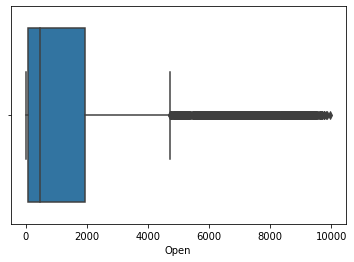

In [ ]:
#box plot with out lier
sns.boxplot(df["Open"])

In [ ]:
df.round(2)

,Unnamed: 0,Sector,Company,BSE,Date,Open,High,Low,Close,Adj Close,Volume,Low_52,High_52,PE_Ratio,Total_Revenue,Gross_Profit,Market_Cap,Net_Company
0,0,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-02,1595.00,1603.95,1441.15,1475.00,1097.87,285450,1793.1,4361.2,23.43,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
1,1,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-03,1478.00,1505.00,1451.10,1496.70,1114.03,264423,1793.1,4361.2,23.43,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
2,2,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-04,1496.00,1505.00,1416.00,1426.30,1061.63,179477,1793.1,4361.2,23.43,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
3,3,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-05,1425.00,1469.80,1420.00,1464.80,1090.28,100888,1793.1,4361.2,23.43,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
4,4,Automobile,BAJAJ AUTO LTD,BAJAJ-AUTO.BO,2012-01-06,1458.50,1472.00,1440.65,1459.20,1086.11,72776,1793.1,4361.2,23.43,3.455747e+11,8.310660e+10,1077559361536,5.881630e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27565,27565,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-27,1091.10,1100.30,1059.40,1085.25,1085.25,41986,240.1,1102.3,174.46,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27566,27566,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-02-28,1096.90,1096.90,1073.00,1080.25,1080.25,18565,240.1,1102.3,174.46,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27567,27567,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-01,1077.05,1085.00,1057.50,1062.80,1062.80,32489,240.1,1102.3,174.46,1.852593e+11,7.313490e+10,521574252544,1.270020e+10
27568,27568,Automobile,TVS MOTOR COMPANY LTD,TVSMOTOR.BO,2023-03-02,1054.55,1072.15,1050.00,1066.35,1066.35,33422,240.1,1102.3,174.46,1.852593e+11,7.313490e+10,521574252544,1.270020e+10


In [ ]:
ncol=list(df.columns)
del ncol[0:5]
print(ncol)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Low_52', 'High_52', 'PE_Ratio', 'Total_Revenue', 'Gross_Profit', 'Market_Cap', 'Net_Company']


In [ ]:
#removing outlier
q1=df["Net_Company"].quantile(.25)
q3=df["Net_Company"].quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
def limit_imputer(value):
  if value>upper_limit:
    return upper_limit
  if value<lower_limit:
    return lower_limit
  else:
    return value
df["Net_Company"]=df["Net_Company"].apply(limit_imputer)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open'>

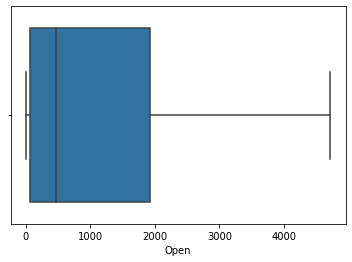

In [ ]:
#boxplot without outliers
sns.boxplot(df["Open"])

In [ ]:
df.to_csv("cleanedAutomobile2.csv")